<b>PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Neural Networks\forestfires.csv')

In [4]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


<b>EDA

In [5]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


<b>DATA VISUALIZATION

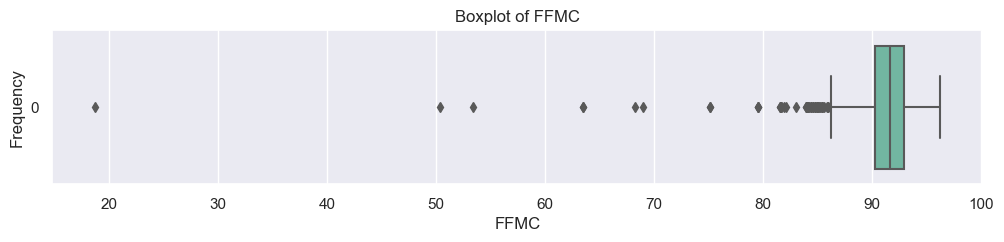

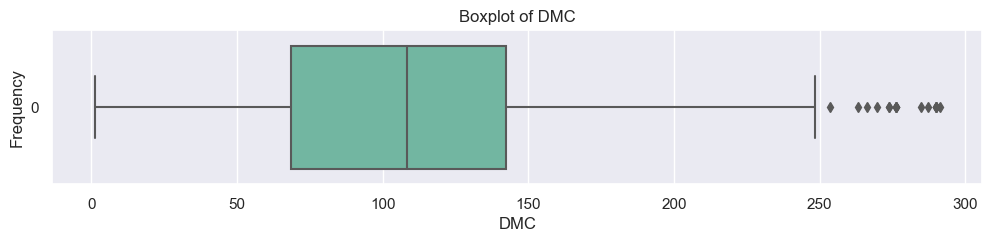

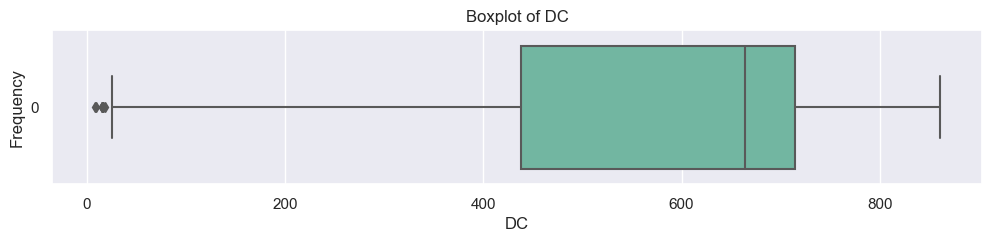

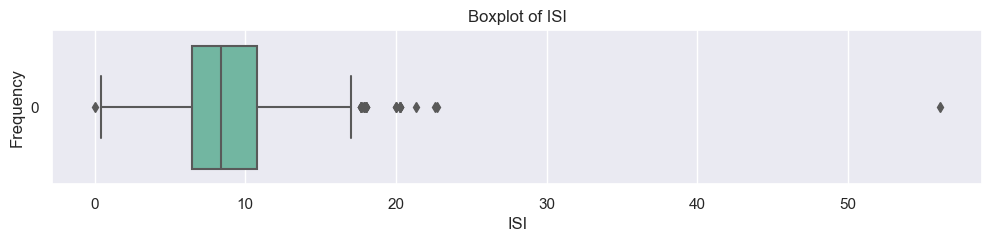

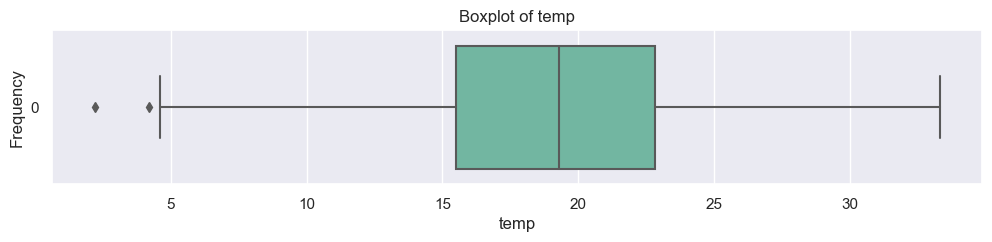

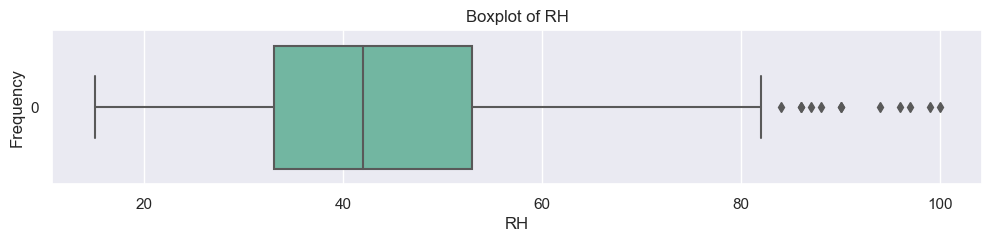

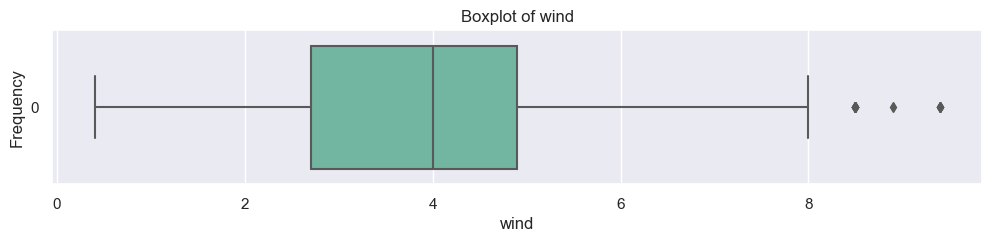

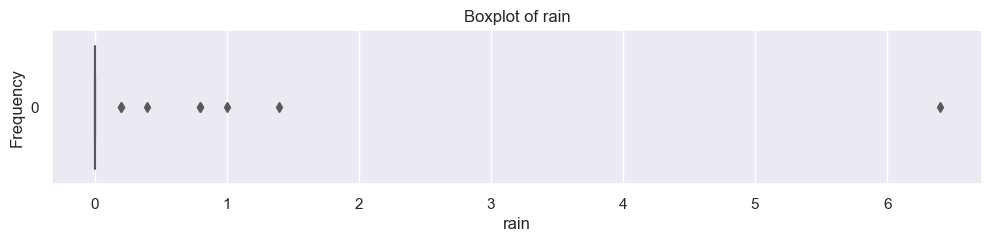

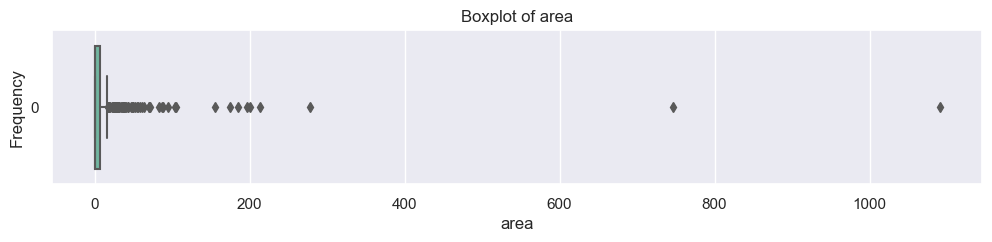

In [8]:
c = data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']]
for i in c:
    plt.figure(figsize=(12,2))
    sns.boxplot(c[i],orient='h',palette='Set2')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {i}')
    plt.show()

<b>Most of the continous variables contain outliers.. We may go for Standardization to reduce the effect of these

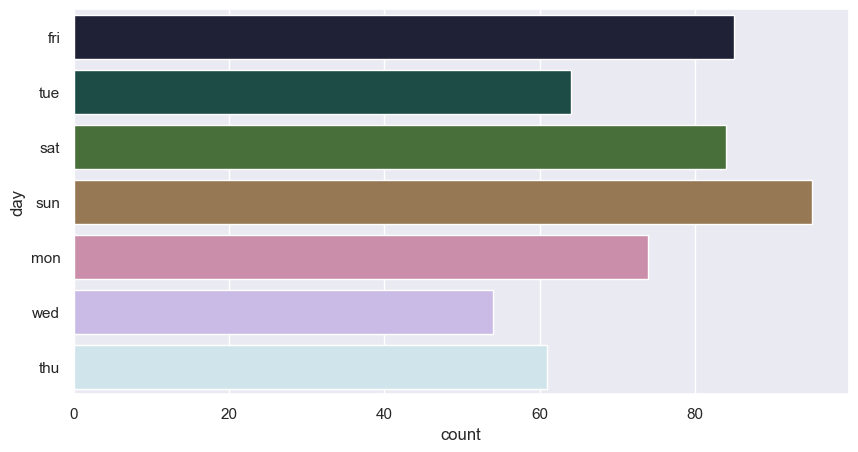

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['day'],data=data,palette='cubehelix')
plt.show()

<b>Fires are most on sundays thean other days

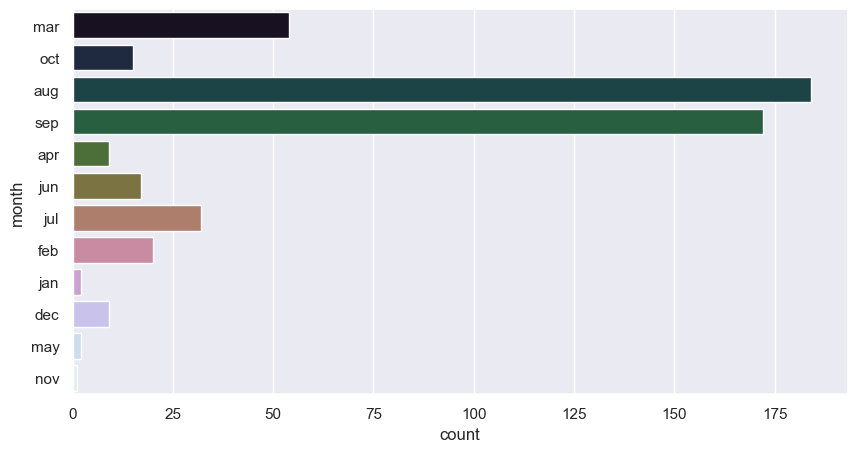

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['month'],data=data,palette='cubehelix')
plt.show()

<b>August and September records more fires

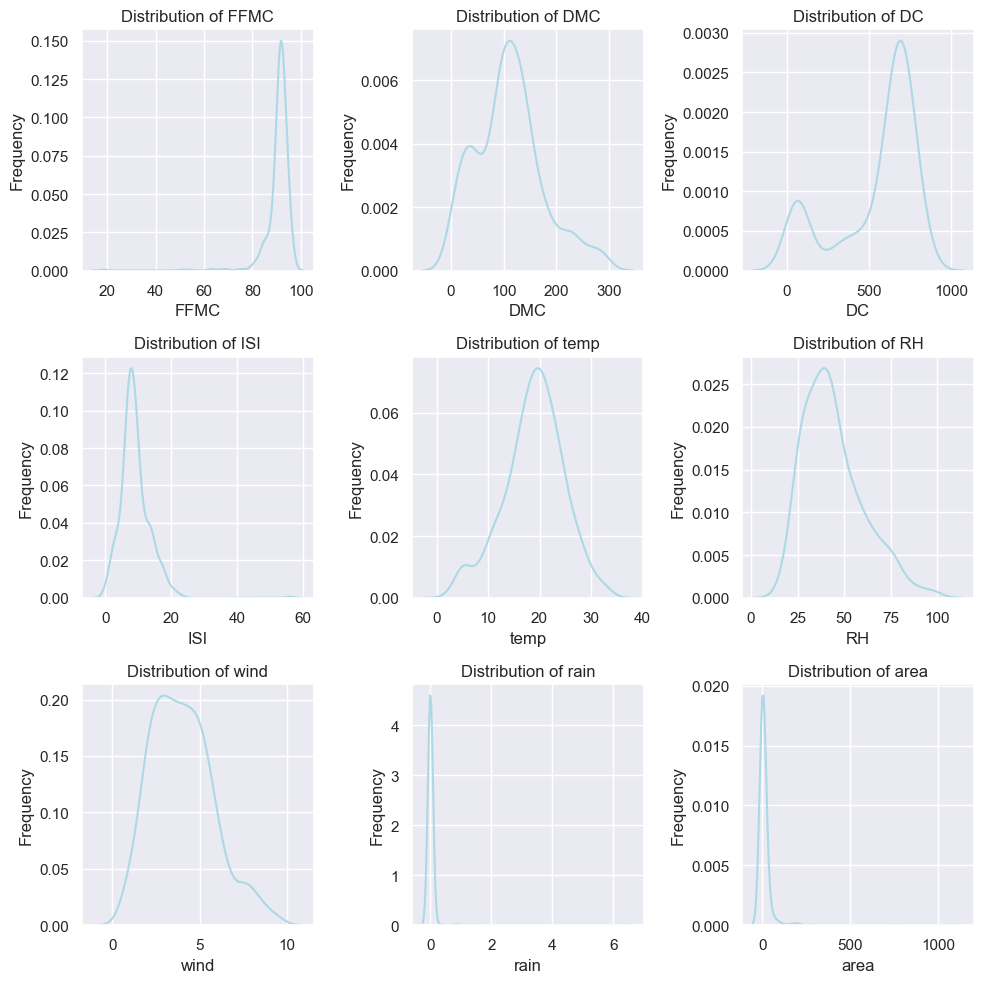

In [11]:
c = data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']]
plt.figure(figsize=(10,10))
for i,cols in enumerate(c.columns,start=1):
    plt.subplot(3,3,i)
    sns.kdeplot(c[cols],color='lightblue')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {cols}')
plt.tight_layout()
plt.show()

<b>Most of the continuous features are skewed.

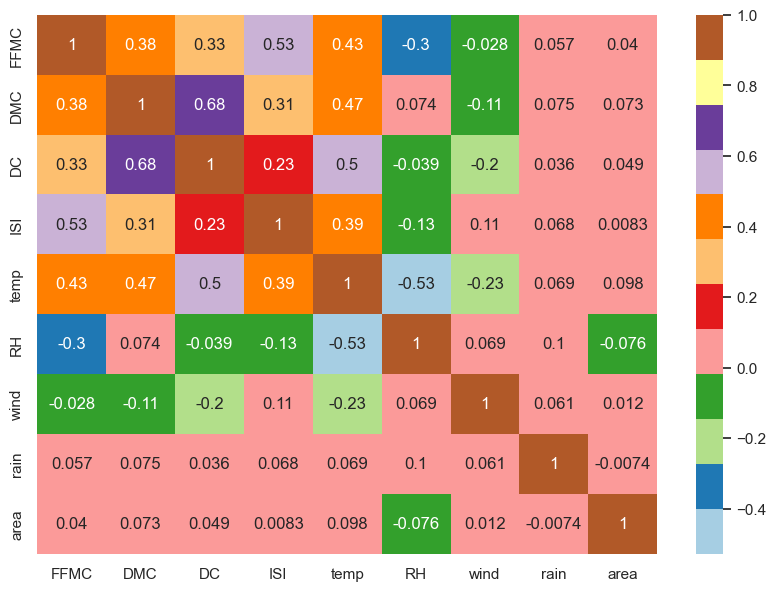

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(c.corr(),annot=True,cmap='Paired')
plt.show()

<b>Heatmap looks fine .There is not much collinearity between variables other than DMC & DC. Lets drop DMC

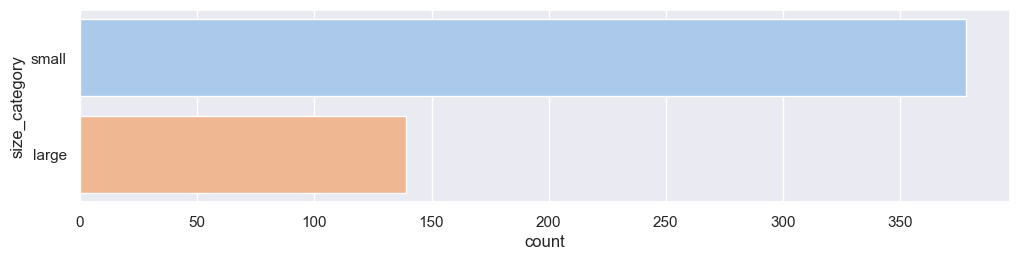

In [13]:
plt.figure(figsize=(12,2.5))
sns.countplot(y = data['size_category'],data=data,palette='pastel')
plt.show()

<b>DATA PREPROCESSING

In [14]:
#let drop all redundunt columns such as month and day since there are encoded in the data already
data_2 = data.drop(['month','day'],axis=1)
data_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
d_scaled = StandardScaler().fit_transform(data_2[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']])
d_scaled = pd.DataFrame(d_scaled,columns=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'])
d_scaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [16]:
data_3 = data_2.drop(['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],axis=1)
data_3

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [17]:
data_4 = pd.concat([d_scaled,data_3],axis=1)
data_4

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,large
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,large
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,large
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,small


In [18]:
from sklearn.preprocessing import LabelEncoder
data_4['size_category'] = LabelEncoder().fit_transform(data_4['size_category'])
data_4

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Split the data into Features and target
x_train=data_4.iloc[:,0:-1]
y_train=data_4.iloc[:,-1]

x_train.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,0
516,-2.020879,-1.685913,-1.780442,-1.739089,-1.222058,-0.815143,0.269509,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

<b><h3>Sequential Neural Network with keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense   

<b>Hyperparameter Selection

<b>n_layers : considering 2 layers since the problem is less complex

<b>activation_function : 'relu' for input and hidden layers, 'sigmoid' for output layer since our classification is binary

<b>dorpout : default

<b>learning rate :.01

<b>loss : binary_crossentropy

<b>optimizer : adam

<b>Define and compile the keras model

In [22]:
from keras.optimizers import Adam
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

In [23]:
def seq_model():
    model = Sequential()
    model.add(Dense(28,input_dim=28,activation='relu'))
    model.add(Dense(14,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [24]:
history = seq_model().fit(x_train,y_train,epochs=150,batch_size=10,validation_split=0.3)

Epoch 1/150
37/37 [==============================] - 2s 8ms/step - loss: 0.6541 - accuracy: 0.6150 - val_loss: 0.6581 - val_accuracy: 0.6667
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7562 - val_loss: 0.6431 - val_accuracy: 0.6731
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7645 - val_loss: 0.6347 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7673 - val_loss: 0.6265 - val_accuracy: 0.6795
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7673 - val_loss: 0.6177 - val_accuracy: 0.6987
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7673 - val_loss: 0.6063 - val_accuracy: 0.6987
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7895 - val_loss: 0.5945 - val_accuracy: 0.6987
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.5345 - val_accuracy: 0.8910
Epoch 60/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.5330 - val_accuracy: 0.8846
Epoch 61/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5491 - val_accuracy: 0.8846
Epoch 62/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.5432 - val_accuracy: 0.8974
Epoch 63/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.5553 - val_accuracy: 0.8846
Epoch 64/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.5528 - val_accuracy: 0.9038
Epoch 65/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.5662 - val_accuracy: 0.8910
Epoch 

<b>For epochs=150 and batch_size=10 we obtain maximum accuracy of 1 and val_accuracy of 0.89.Reduced validation accuracy maybe because of the small size of dataset

In [25]:
#GridSearch for Optimum number of epochs and batch_size
from scikeras.wrappers import KerasClassifier , KerasRegressor
from sklearn.model_selection import KFold,GridSearchCV

In [26]:
model1 = KerasClassifier(seq_model)
batch_size = [10,20,40,50]
epochs = [10,50,100,150,200]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=1,scoring='accuracy')
grid_result = grid.fit(x_train,y_train)

print(f'Best Score : {grid_result.best_score_},Best Parameters : {grid_result.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Epoch 1/10
42/42 [==============================] - 1s 1ms/step - loss: 0.6721 - accuracy: 0.6271
Epoch 2/10
42/42 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.6586
Epoch 3/10
42/42 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.6634
Epoch 4/10
42/42 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.6780
Epoch 5/10
42/42 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6804
Epoch 6/10
42/42 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7046
Epoch 7/10
42/42 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.7240
Epoch 8/10
42/42 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7385
Epoch 9/10
42/42 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7433
Epoch 10/10
11/11 [==============================] - 0s 

42/42 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8357
Epoch 12/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8430
Epoch 13/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8599
Epoch 14/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8551
Epoch 15/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8889
Epoch 16/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8841
Epoch 17/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9034
Epoch 18/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.9010
Epoch 19/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9082
Epoch 20/50
42/42 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9179
Epoch 21/50
42/42 [===

42/42 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9370
Epoch 25/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9516
Epoch 26/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.9613
Epoch 27/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9709
Epoch 28/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9637
Epoch 29/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9782
Epoch 30/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9758
Epoch 31/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9831
Epoch 32/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9903
Epoch 33/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9806
Epoch 34/100


42/42 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 88/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 89/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 90/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 91/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 92/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 93/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 94/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 95/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 96/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 97/100


42/42 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 50/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 51/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 52/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 53/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 54/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 55/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 56/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 57/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 58/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 59/100


42/42 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8039
Epoch 12/150
42/42 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8354
Epoch 13/150
42/42 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8426
Epoch 14/150
42/42 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8789
Epoch 15/150
42/42 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8910
Epoch 16/150
42/42 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8789
Epoch 17/150
42/42 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9007
Epoch 18/150
42/42 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.9080
Epoch 19/150
42/42 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9128
Epoch 20/150
42/42 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9128
Epoch 21/150


42/42 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 94/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 95/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 96/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 97/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 98/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 99/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 100/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 101/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 102/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 103/

42/42 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9516
Epoch 25/150
42/42 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9564
Epoch 26/150
42/42 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9661
Epoch 27/150
42/42 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9588
Epoch 28/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9685
Epoch 29/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9806
Epoch 30/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9782
Epoch 31/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9879
Epoch 32/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9782
Epoch 33/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9927
Epoch 34/150


Epoch 106/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 107/150
42/42 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 108/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 109/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 110/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 111/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 112/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 113/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 114/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 115/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0017 - accurac

42/42 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 118/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 119/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 120/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 121/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 122/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 123/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 124/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 125/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 126/150
42/42 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoc

42/42 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 130/150
42/42 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 131/150
42/42 [==============================] - 0s 1ms/step - loss: 9.8040e-04 - accuracy: 1.0000
Epoch 132/150
42/42 [==============================] - 0s 1ms/step - loss: 9.5774e-04 - accuracy: 1.0000
Epoch 133/150
42/42 [==============================] - 0s 1ms/step - loss: 9.4349e-04 - accuracy: 1.0000
Epoch 134/150
42/42 [==============================] - 0s 1ms/step - loss: 9.5615e-04 - accuracy: 1.0000
Epoch 135/150
42/42 [==============================] - 0s 1ms/step - loss: 8.7946e-04 - accuracy: 1.0000
Epoch 136/150
42/42 [==============================] - 0s 1ms/step - loss: 8.6274e-04 - accuracy: 1.0000
Epoch 137/150
42/42 [==============================] - 0s 1ms/step - loss: 8.1299e-04 - accuracy: 1.0000
Epoch 138/150
42/42 [==============================] - 0s 1ms/step - loss: 8.

42/42 [==============================] - 0s 1ms/step - loss: 6.2260e-04 - accuracy: 1.0000
Epoch 141/150
42/42 [==============================] - 0s 1ms/step - loss: 6.0791e-04 - accuracy: 1.0000
Epoch 142/150
42/42 [==============================] - 0s 1ms/step - loss: 6.2351e-04 - accuracy: 1.0000
Epoch 143/150
42/42 [==============================] - 0s 1ms/step - loss: 5.9622e-04 - accuracy: 1.0000
Epoch 144/150
42/42 [==============================] - 0s 1ms/step - loss: 5.5818e-04 - accuracy: 1.0000
Epoch 145/150
42/42 [==============================] - 0s 1ms/step - loss: 5.4487e-04 - accuracy: 1.0000
Epoch 146/150
42/42 [==============================] - 0s 1ms/step - loss: 5.5026e-04 - accuracy: 1.0000
Epoch 147/150
42/42 [==============================] - 0s 1ms/step - loss: 5.3814e-04 - accuracy: 1.0000
Epoch 148/150
42/42 [==============================] - 0s 1ms/step - loss: 5.0057e-04 - accuracy: 1.0000
Epoch 149/150
42/42 [==============================] - 0s 1ms/step - 

42/42 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 72/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 73/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 74/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 75/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 76/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 77/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 78/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 79/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 80/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 81/200


42/42 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9685
Epoch 32/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9758
Epoch 33/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9709
Epoch 34/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9734
Epoch 35/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9855
Epoch 36/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9855
Epoch 37/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9879
Epoch 38/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9927
Epoch 39/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9952
Epoch 40/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9903
Epoch 41/200


42/42 [==============================] - 0s 1ms/step - loss: 2.5164e-04 - accuracy: 1.0000
Epoch 192/200
42/42 [==============================] - 0s 1ms/step - loss: 2.2102e-04 - accuracy: 1.0000
Epoch 193/200
42/42 [==============================] - 0s 1ms/step - loss: 2.0773e-04 - accuracy: 1.0000
Epoch 194/200
42/42 [==============================] - 0s 1ms/step - loss: 2.2488e-04 - accuracy: 1.0000
Epoch 195/200
42/42 [==============================] - 0s 1ms/step - loss: 2.1363e-04 - accuracy: 1.0000
Epoch 196/200
42/42 [==============================] - 0s 1ms/step - loss: 2.2287e-04 - accuracy: 1.0000
Epoch 197/200
42/42 [==============================] - 0s 1ms/step - loss: 2.0123e-04 - accuracy: 1.0000
Epoch 198/200
42/42 [==============================] - 0s 1ms/step - loss: 1.8911e-04 - accuracy: 1.0000
Epoch 199/200
42/42 [==============================] - 0s 1ms/step - loss: 1.7963e-04 - accuracy: 1.0000
Epoch 200/200
11/11 [==============================] - 0s 1ms/step
Ep

42/42 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 73/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 74/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9976
Epoch 75/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9976
Epoch 76/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 77/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 78/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 79/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 80/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 81/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 82/200


42/42 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9686
Epoch 33/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9758
Epoch 34/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9831
Epoch 35/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9831
Epoch 36/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9855
Epoch 37/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9879
Epoch 38/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9952
Epoch 39/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9903
Epoch 40/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9952
Epoch 41/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9976
Epoch 42/200


42/42 [==============================] - 0s 1ms/step - loss: 1.9573e-04 - accuracy: 1.0000
Epoch 192/200
42/42 [==============================] - 0s 1ms/step - loss: 1.8925e-04 - accuracy: 1.0000
Epoch 193/200
42/42 [==============================] - 0s 1ms/step - loss: 1.9489e-04 - accuracy: 1.0000
Epoch 194/200
42/42 [==============================] - 0s 1ms/step - loss: 1.8985e-04 - accuracy: 1.0000
Epoch 195/200
42/42 [==============================] - 0s 1ms/step - loss: 1.7313e-04 - accuracy: 1.0000
Epoch 196/200
42/42 [==============================] - 0s 1ms/step - loss: 1.8779e-04 - accuracy: 1.0000
Epoch 197/200
42/42 [==============================] - 0s 1ms/step - loss: 1.9955e-04 - accuracy: 1.0000
Epoch 198/200
42/42 [==============================] - 0s 1ms/step - loss: 1.7532e-04 - accuracy: 1.0000
Epoch 199/200
42/42 [==============================] - 0s 1ms/step - loss: 1.6681e-04 - accuracy: 1.0000
Epoch 200/200
11/11 [==============================] - 0s 1ms/step
Ep

42/42 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 73/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 74/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 75/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 76/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 77/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 78/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 79/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 80/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 81/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 82/200


6/6 [==============================] - 0s 2ms/step
Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7440
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.7440
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7440
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7440
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7440
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7440
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7440
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7440
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7440
Epoch 10/10
6/6 [==============================] - 0s 1ms/step
Epoc

21/21 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9686
Epoch 44/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9710
Epoch 45/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9686
Epoch 46/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9783
Epoch 47/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9686
Epoch 48/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9783
Epoch 49/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9734
Epoch 50/50
6/6 [==============================] - 0s 2ms/step
Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.7053
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7391
Epoch 3/50
21/21 [==============================] - 0s 1ms/s

21/21 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.8961
Epoch 26/50
21/21 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9034
Epoch 27/50
21/21 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9275
Epoch 28/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9130
Epoch 29/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9348
Epoch 30/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9396
Epoch 31/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9420
Epoch 32/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.9517
Epoch 33/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9517
Epoch 34/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9614
Epoch 35/50
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9516
Epoch 38/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9564
Epoch 39/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9564
Epoch 40/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9613
Epoch 41/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9613
Epoch 42/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9613
Epoch 43/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9637
Epoch 44/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9685
Epoch 45/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9637
Epoch 46/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9758
Epoch 47/100


6/6 [==============================] - 0s 3ms/step
Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7570 - accuracy: 0.3647
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6618
Epoch 3/100
21/21 [==============================] - 0s 934us/step - loss: 0.5965 - accuracy: 0.7705
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7754
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7826
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7826
Epoch 7/100
21/21 [==============================] - 0s 984us/step - loss: 0.5046 - accuracy: 0.7850
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7923
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7995
Epoch 10/100
21/21 [==============================] - 

21/21 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 63/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 64/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 65/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 66/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 67/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9976
Epoch 68/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 69/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 70/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 71/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 72/100


21/21 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 125/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 126/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 127/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 128/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 129/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 130/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 131/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 132/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 133/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoc

21/21 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 137/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 138/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 139/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 140/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 141/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 142/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 143/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 144/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 145/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoc

21/21 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 149/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 150/150
6/6 [==============================] - 0s 1ms/step
Epoch 1/150
21/21 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5459
Epoch 2/150
21/21 [==============================] - 0s 813us/step - loss: 0.6448 - accuracy: 0.7150
Epoch 3/150
21/21 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.7415
Epoch 4/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.7415
Epoch 5/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7415
Epoch 6/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7464
Epoch 7/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7488
Epoch 8/150
21/21 [==============================] -

21/21 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7899
Epoch 11/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7923
Epoch 12/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8068
Epoch 13/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8140
Epoch 14/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8237
Epoch 15/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8309
Epoch 16/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8333
Epoch 17/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8333
Epoch 18/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8382
Epoch 19/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8406
Epoch 20/150


21/21 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 93/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 94/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 95/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 96/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 97/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 98/150
21/21 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 99/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 100/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 101/150
21/21 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 102/1

21/21 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8814
Epoch 24/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8910
Epoch 25/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8886
Epoch 26/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8959
Epoch 27/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9104
Epoch 28/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9056
Epoch 29/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9153
Epoch 30/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9249
Epoch 31/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9249
Epoch 32/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9395
Epoch 33/200


Epoch 105/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 106/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 107/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 108/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 109/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 110/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 111/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 112/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 113/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 114/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0082 - accurac

21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 187/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 188/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 189/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 190/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 191/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 192/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 193/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 194/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 195/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoc

21/21 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 149/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 150/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 151/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 152/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 153/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 154/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 155/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 156/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 157/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoc

21/21 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9130
Epoch 30/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9348
Epoch 31/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9300
Epoch 32/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9372
Epoch 33/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9469
Epoch 34/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9541
Epoch 35/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9517
Epoch 36/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9565
Epoch 37/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9614
Epoch 38/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9686
Epoch 39/200


21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 192/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 193/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 194/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 195/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 196/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 197/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 198/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 199/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 200/200
6/6 [==============================] - 0s 1ms/step
Epoch 1/200
21/21 [=====================

21/21 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 154/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 155/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 156/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 157/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 158/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 159/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 160/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 161/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 162/200
21/21 [==============================] - 0s 945us/step - loss: 0.0018 - accuracy: 1.0000
Ep

21/21 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 115/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 116/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 117/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 118/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 119/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 120/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 121/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 122/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 123/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7240
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7337
Epoch 12/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7433
Epoch 13/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7554
Epoch 14/50
11/11 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.7651
Epoch 15/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7700
Epoch 16/50
11/11 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7724
Epoch 17/50
11/11 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7700
Epoch 18/50
11/11 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7772
Epoch 19/50
11/11 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7845
Epoch 20/50
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8382
Epoch 25/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8430
Epoch 26/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8454
Epoch 27/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8502
Epoch 28/50
11/11 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8575
Epoch 29/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8647
Epoch 30/50
11/11 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8696
Epoch 31/50
11/11 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8696
Epoch 32/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8816
Epoch 33/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2721 - accuracy: 0.8889
Epoch 34/50
11/11 [===

Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7070
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7046
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.7070
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7070
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7119
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7215
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7215
Epoch 13/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7264
Epoch 14/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7264
Epoch 15/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7312
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9685
Epoch 69/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9782
Epoch 70/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9806
Epoch 71/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9831
Epoch 72/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9855
Epoch 73/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9855
Epoch 74/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9855
Epoch 75/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9903
Epoch 76/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9879
Epoch 77/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9879
Epoch 78/100


11/11 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8865
Epoch 31/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8816
Epoch 32/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8841
Epoch 33/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.8961
Epoch 34/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8937
Epoch 35/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9010
Epoch 36/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.9058
Epoch 37/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9130
Epoch 38/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9130
Epoch 39/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9106
Epoch 40/100


11/11 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 94/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 95/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 96/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 97/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 98/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 99/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 100/100
3/3 [==============================] - 0s 0s/step
Epoch 1/150
11/11 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5303
Epoch 2/150
11/11 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6199
Epoch 3/150
11/11 [==============================] 

11/11 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.7288
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7312
Epoch 7/150
11/11 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7361
Epoch 8/150
11/11 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7458
Epoch 9/150
11/11 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7458
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7506
Epoch 11/150
11/11 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7554
Epoch 12/150
11/11 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7603
Epoch 13/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7724
Epoch 14/150
11/11 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7724
Epoch 15/150
11/1

11/11 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9927
Epoch 88/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9927
Epoch 89/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9927
Epoch 90/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9927
Epoch 91/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9927
Epoch 92/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9927
Epoch 93/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9927
Epoch 94/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9952
Epoch 95/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9952
Epoch 96/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9952
Epoch 97/150


11/11 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7995
Epoch 19/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7995
Epoch 20/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7995
Epoch 21/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7995
Epoch 22/150
11/11 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8019
Epoch 23/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8019
Epoch 24/150
11/11 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8068
Epoch 25/150
11/11 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8068
Epoch 26/150
11/11 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8068
Epoch 27/150
11/11 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8164
Epoch 28/150


11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9928
Epoch 101/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9928
Epoch 102/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9928
Epoch 103/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9928
Epoch 104/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9928
Epoch 105/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9928
Epoch 106/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9928
Epoch 107/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9928
Epoch 108/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9928
Epoch 109/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9976
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 113/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 114/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 115/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 116/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 117/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 118/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 119/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 120/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 121/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 125/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 126/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 127/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 128/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 129/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 130/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 131/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 132/150
11/11 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 133/150
11/11 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 137/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 138/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 139/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 140/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 141/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 142/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 143/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 144/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 145/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9976
Epoch 99/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9976
Epoch 100/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9976
Epoch 101/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9976
Epoch 102/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9952
Epoch 103/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 104/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 105/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9976
Epoch 106/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 107/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9976
Epoch

11/11 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9396
Epoch 61/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9517
Epoch 62/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.9517
Epoch 63/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9589
Epoch 64/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9565
Epoch 65/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9541
Epoch 66/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9662
Epoch 67/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9614
Epoch 68/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9614
Epoch 69/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9662
Epoch 70/200


11/11 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8261
Epoch 23/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8285
Epoch 24/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8285
Epoch 25/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8285
Epoch 26/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8406
Epoch 27/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8502
Epoch 28/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8551
Epoch 29/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8575
Epoch 30/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8599
Epoch 31/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8647
Epoch 32/200


Epoch 104/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 105/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 106/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 107/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 108/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 109/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 110/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 111/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 112/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 113/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0196 - accurac

11/11 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 186/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 187/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 188/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 189/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 190/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 191/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 192/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 193/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 194/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 148/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 149/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 150/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 151/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 152/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 153/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 154/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 155/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 156/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000
Epoc

9/9 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7705
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7874
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6715
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.7295
Epoch 3/10
9/9 [==============================] - 0s 428us/step - loss: 0.6135 - accuracy: 0.7391
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7415
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.7440
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7440
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7440
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5530 - acc

9/9 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8768
Epoch 45/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8792
Epoch 46/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8816
Epoch 47/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8889
Epoch 48/50
9/9 [==============================] - 0s 740us/step - loss: 0.2656 - accuracy: 0.8937
Epoch 49/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8961
Epoch 50/50
3/3 [==============================] - 0s 0s/step
Epoch 1/50
9/9 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7367
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7391
Epoch 3/50
9/9 [==============================] - 0s 897us/step - loss: 0.5942 - accuracy: 0.7415
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5765

9/9 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9322
Epoch 61/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9370
Epoch 62/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1856 - accuracy: 0.9370
Epoch 63/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9370
Epoch 64/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9492
Epoch 65/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9516
Epoch 66/100
9/9 [==============================] - 0s 757us/step - loss: 0.1679 - accuracy: 0.9443
Epoch 67/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9467
Epoch 68/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9540
Epoch 69/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9637
Epoch 70/100
9/9 [=============

9/9 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8068
Epoch 27/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8068
Epoch 28/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8092
Epoch 29/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8116
Epoch 30/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8116
Epoch 31/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8140
Epoch 32/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8164
Epoch 33/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8261
Epoch 34/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8285
Epoch 35/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8309
Epoch 36/100
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9903
Epoch 93/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9928
Epoch 94/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9903
Epoch 95/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9928
Epoch 96/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9928
Epoch 97/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9928
Epoch 98/100
9/9 [==============================] - 0s 604us/step - loss: 0.0466 - accuracy: 0.9928
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9928
Epoch 100/100
3/3 [==============================] - 0s 0s/step
Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7126
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - l

9/9 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9201
Epoch 59/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9298
Epoch 60/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9249
Epoch 61/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9274
Epoch 62/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9322
Epoch 63/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9370
Epoch 64/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9395
Epoch 65/150
9/9 [==============================] - 0s 748us/step - loss: 0.1765 - accuracy: 0.9370
Epoch 66/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9370
Epoch 67/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9395
Epoch 68/150
9/9 [=============

9/9 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9709
Epoch 75/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9782
Epoch 76/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9806
Epoch 77/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9758
Epoch 78/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9831
Epoch 79/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9831
Epoch 80/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9831
Epoch 81/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9758
Epoch 82/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9831
Epoch 83/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9831
Epoch 84/150
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9855
Epoch 90/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9952
Epoch 91/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9855
Epoch 92/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9903
Epoch 93/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9928
Epoch 94/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9928
Epoch 95/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9952
Epoch 96/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9928
Epoch 97/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9952
Epoch 98/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9952
Epoch 99/150
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9903
Epoch 105/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9903
Epoch 106/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9928
Epoch 107/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9928
Epoch 108/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9928
Epoch 109/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9952
Epoch 110/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9928
Epoch 111/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9903
Epoch 112/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9952
Epoch 113/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9928
Epoch 114/150
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 120/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9976
Epoch 121/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 122/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 123/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9976
Epoch 124/150
9/9 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9976
Epoch 125/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 126/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 127/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9976
Epoch 128/150
9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 129/150
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 135/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 136/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 137/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 138/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 139/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 140/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 141/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 142/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 143/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 144/200
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9952
Epoch 100/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9879
Epoch 101/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9927
Epoch 102/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9952
Epoch 103/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9952
Epoch 104/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9952
Epoch 105/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9952
Epoch 106/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9952
Epoch 107/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9952
Epoch 108/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9952
Epoch 109/200
9/9 [=====

9/9 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9469
Epoch 65/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9493
Epoch 66/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9420
Epoch 67/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9493
Epoch 68/200
9/9 [==============================] - 0s 856us/step - loss: 0.1533 - accuracy: 0.9517
Epoch 69/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9493
Epoch 70/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9469
Epoch 71/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9517
Epoch 72/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9541
Epoch 73/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9589
Epoch 74/200
9/9 [=============

9/9 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 148/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 149/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 150/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 151/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 152/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 153/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 154/200
9/9 [==============================] - 0s 633us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 155/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 156/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 157/200
9/9 [===

9/9 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 113/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 114/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 115/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 116/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 1.0000
Epoch 117/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 118/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 119/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 120/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 121/200
9/9 [==============================] - 0s 854us/step - loss: 0.0276 - accuracy: 1.0000
Epoch 122/200
9/9 [===

9/9 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9758
Epoch 78/200
9/9 [==============================] - 0s 803us/step - loss: 0.0856 - accuracy: 0.9758
Epoch 79/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9831
Epoch 80/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9855
Epoch 81/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9831
Epoch 82/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9831
Epoch 83/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9831
Epoch 84/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9879
Epoch 85/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9879
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9879
Epoch 87/200
9/9 [=============

9/9 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 161/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 162/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 163/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 164/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 165/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 166/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 167/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 168/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 170/200
9/9 [=====

Epoch 42/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9981
Epoch 43/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 44/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 45/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 46/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 47/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9981
Epoch 48/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 49/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 50/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 51/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 1.0000


In [27]:
#Lets Build the model with the results from GridSearchCv
def optimum_model():
    opt_model = Sequential()
    opt_model.add(Dense(28,input_dim=28,activation='relu'))
    opt_model.add(Dense(14,activation='relu'))
    opt_model.add(Dense(1,activation='sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    opt_model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return opt_model

In [28]:
history_2 = optimum_model().fit(x_train,y_train,batch_size=10,epochs=200,validation_split=0.3)

Epoch 1/200
37/37 [==============================] - 1s 7ms/step - loss: 0.5829 - accuracy: 0.7396 - val_loss: 0.6380 - val_accuracy: 0.6987
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8116 - val_loss: 0.5129 - val_accuracy: 0.7756
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.8947 - val_loss: 0.5367 - val_accuracy: 0.8269
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8892 - val_loss: 0.5281 - val_accuracy: 0.8141
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9363 - val_loss: 0.6942 - val_accuracy: 0.8013
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9612 - val_loss: 0.5356 - val_accuracy: 0.8782
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9695 - val_loss: 0.5269 - val_accuracy: 0.8974
Epoch 8/200
3

Epoch 58/200
37/37 [==============================] - 0s 2ms/step - loss: 9.3666e-05 - accuracy: 1.0000 - val_loss: 2.0654 - val_accuracy: 0.9038
Epoch 59/200
37/37 [==============================] - 0s 2ms/step - loss: 8.8911e-05 - accuracy: 1.0000 - val_loss: 2.0853 - val_accuracy: 0.8974
Epoch 60/200
37/37 [==============================] - 0s 2ms/step - loss: 8.2488e-05 - accuracy: 1.0000 - val_loss: 2.1008 - val_accuracy: 0.8974
Epoch 61/200
37/37 [==============================] - 0s 2ms/step - loss: 8.0296e-05 - accuracy: 1.0000 - val_loss: 2.1210 - val_accuracy: 0.8974
Epoch 62/200
37/37 [==============================] - 0s 2ms/step - loss: 7.4752e-05 - accuracy: 1.0000 - val_loss: 2.1307 - val_accuracy: 0.8910
Epoch 63/200
37/37 [==============================] - 0s 2ms/step - loss: 7.4378e-05 - accuracy: 1.0000 - val_loss: 2.1444 - val_accuracy: 0.8910
Epoch 64/200
37/37 [==============================] - 0s 2ms/step - loss: 7.9041e-05 - accuracy: 1.0000 - val_loss: 2.1652 -

37/37 [==============================] - 0s 2ms/step - loss: 1.3722e-05 - accuracy: 1.0000 - val_loss: 2.7808 - val_accuracy: 0.8846
Epoch 115/200
37/37 [==============================] - 0s 2ms/step - loss: 1.3379e-05 - accuracy: 1.0000 - val_loss: 2.7907 - val_accuracy: 0.8846
Epoch 116/200
37/37 [==============================] - 0s 2ms/step - loss: 1.3197e-05 - accuracy: 1.0000 - val_loss: 2.7989 - val_accuracy: 0.8846
Epoch 117/200
37/37 [==============================] - 0s 2ms/step - loss: 1.2673e-05 - accuracy: 1.0000 - val_loss: 2.8080 - val_accuracy: 0.8846
Epoch 118/200
37/37 [==============================] - 0s 2ms/step - loss: 1.2581e-05 - accuracy: 1.0000 - val_loss: 2.8213 - val_accuracy: 0.8846
Epoch 119/200
37/37 [==============================] - 0s 2ms/step - loss: 1.1991e-05 - accuracy: 1.0000 - val_loss: 2.8276 - val_accuracy: 0.8846
Epoch 120/200
37/37 [==============================] - 0s 2ms/step - loss: 1.1839e-05 - accuracy: 1.0000 - val_loss: 2.8392 - val_ac

Epoch 170/200
37/37 [==============================] - 0s 2ms/step - loss: 3.5111e-06 - accuracy: 1.0000 - val_loss: 3.3246 - val_accuracy: 0.8910
Epoch 171/200
37/37 [==============================] - 0s 2ms/step - loss: 3.3902e-06 - accuracy: 1.0000 - val_loss: 3.3328 - val_accuracy: 0.8910
Epoch 172/200
37/37 [==============================] - 0s 2ms/step - loss: 3.3219e-06 - accuracy: 1.0000 - val_loss: 3.3416 - val_accuracy: 0.8910
Epoch 173/200
37/37 [==============================] - 0s 2ms/step - loss: 3.2967e-06 - accuracy: 1.0000 - val_loss: 3.3512 - val_accuracy: 0.8910
Epoch 174/200
37/37 [==============================] - 0s 2ms/step - loss: 3.2028e-06 - accuracy: 1.0000 - val_loss: 3.3612 - val_accuracy: 0.8910
Epoch 175/200
37/37 [==============================] - 0s 2ms/step - loss: 3.0835e-06 - accuracy: 1.0000 - val_loss: 3.3667 - val_accuracy: 0.8910
Epoch 176/200
37/37 [==============================] - 0s 2ms/step - loss: 3.0131e-06 - accuracy: 1.0000 - val_loss: 3

In [32]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

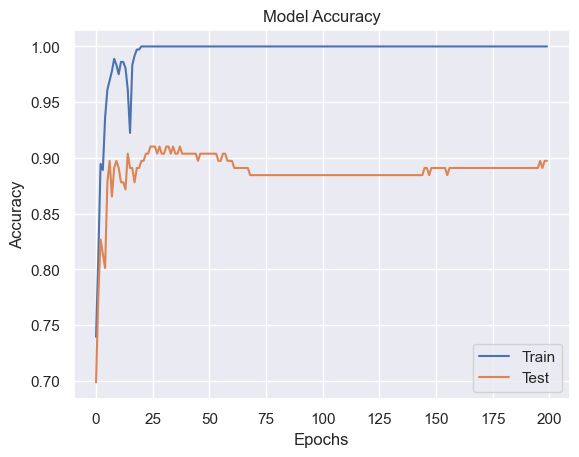

In [33]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

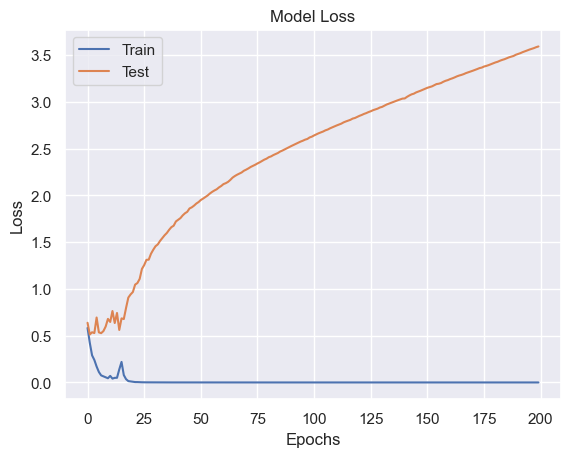

In [34]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')
plt.show()

<b>Observation:<br>
    
<b>The model test loss is incresing drastically with respect to epochs .Its a sign of overfitting. The model is not learnig from the given dataset properly since it is quite small in size

In [35]:
#Hyperparameter Tuning | KerasTuner

X = x_train.copy()
Y = y_train.copy()

from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [36]:
def build_model(hp):
    model2 = Sequential()
    for i in range(hp.Int('num_layers',2,15)):
        model2.add(Dense(units=hp.Int('unuts_'+str(i),min_value=8,max_value=512,step=8),activation='relu'))
        model2.add(Dense(1,activation='sigmoid'))
        model2.compile(optimizer=Adam(hp.Choice('learning_rate',[1e-2])),loss='binary_crossentropy',metrics=['accuracy'])
    return model2

In [37]:
#Finding optimized hyperparameters using Keras tuner
from scikeras.wrappers import KerasClassifier
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(build_model,objective='val_accuracy',
                     max_trials=10,executions_per_trial=5,
                     directory='project_',project_name='forest_fires_')

Using TensorFlow backend
Reloading Tuner from project_\forest_fires_\tuner0.json


In [38]:
tuner.search(x1_train,y1_train,epochs=10,validation_data=(x1_test,y1_test))

In [39]:
tuner.results_summary()

Results summary
Results in project_\forest_fires_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
num_layers: 3
unuts_0: 184
learning_rate: 0.01
unuts_1: 8
unuts_2: 512
unuts_3: 184
unuts_4: 296
unuts_5: 104
unuts_6: 224
unuts_7: 96
unuts_8: 488
unuts_9: 464
unuts_10: 208
unuts_11: 368
unuts_12: 8
unuts_13: 168
unuts_14: 128
Score: 0.9307692289352417

Trial 07 summary
Hyperparameters:
num_layers: 3
unuts_0: 64
learning_rate: 0.01
unuts_1: 120
unuts_2: 328
unuts_3: 232
unuts_4: 24
unuts_5: 240
unuts_6: 312
unuts_7: 88
unuts_8: 296
unuts_9: 296
unuts_10: 336
unuts_11: 296
unuts_12: 472
unuts_13: 480
unuts_14: 272
Score: 0.917307686805725

Trial 01 summary
Hyperparameters:
num_layers: 13
unuts_0: 456
learning_rate: 0.01
unuts_1: 48
unuts_2: 496
unuts_3: 200
unuts_4: 24
unuts_5: 400
unuts_6: 248
unuts_7: 480
unuts_8: 464
unuts_9: 288
unuts_10: 328
unuts_11: 8
unuts_12: 8
Score: 0.7115384340286255

Trial 09 summary
Hyperparameters:
n

In [40]:
best_para = tuner.get_best_hyperparameters(num_trials=6)[0]

In [41]:
print(best_para.values)

{'num_layers': 3, 'unuts_0': 184, 'learning_rate': 0.01, 'unuts_1': 8, 'unuts_2': 512, 'unuts_3': 184, 'unuts_4': 296, 'unuts_5': 104, 'unuts_6': 224, 'unuts_7': 96, 'unuts_8': 488, 'unuts_9': 464, 'unuts_10': 208, 'unuts_11': 368, 'unuts_12': 8, 'unuts_13': 168, 'unuts_14': 128}


<b>New model and prediction

In [42]:
import tensorflow as tf
np.random.seed(37)
tf.random.set_seed(89)

In [43]:
model_new = Sequential()
model_new.add(Dense(184,input_dim=x_train.shape[1],activation='relu'))
model_new.add(Dense(8,activation='relu'))
model_new.add(Dense(512,activation='relu'))
model_new.add(Dense(1,activation='sigmoid'))    
adam = Adam(learning_rate=0.01)

model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
history_new = model_new.fit(X,Y,epochs=10,batch_size=11,validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 1s 6ms/step - loss: 0.5923 - accuracy: 0.7337 - val_loss: 0.6138 - val_accuracy: 0.7019
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7458 - val_loss: 0.5817 - val_accuracy: 0.7404
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8160 - val_loss: 0.5156 - val_accuracy: 0.7981
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8717 - val_loss: 0.4717 - val_accuracy: 0.8365
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9104 - val_loss: 0.4966 - val_accuracy: 0.8462
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9467 - val_loss: 0.7130 - val_accuracy: 0.7308
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9492 - val_loss: 0.7824 - val_accuracy: 0.7308
Epoch 8/10
38/38 [==

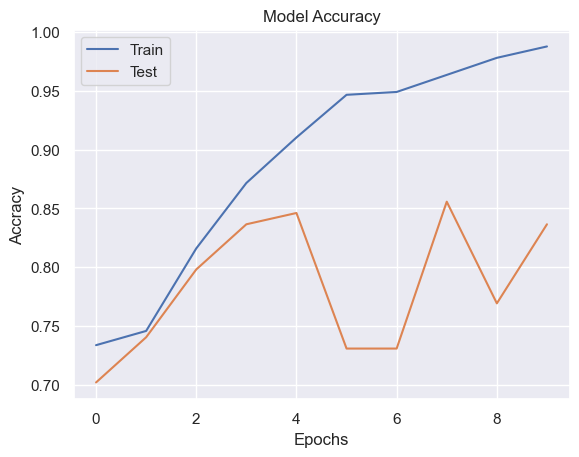

In [45]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

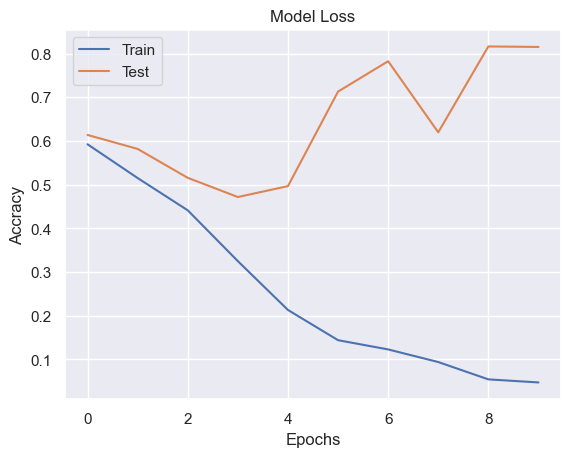

In [46]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

<b>Model loss is converging after 5th epoch. So with 10 epochs we have obtained a better model compared to former one

In [47]:
y_pred = model_new.predict(x1_test)

4/4 [==============================] - 0s 2ms/step


In [48]:
y_pred

array([[9.9920017e-01],
       [9.9943012e-01],
       [9.9972445e-01],
       [2.1947782e-01],
       [9.9889696e-01],
       [9.9837565e-01],
       [9.8300934e-01],
       [9.9067605e-01],
       [9.9988359e-01],
       [9.9998415e-01],
       [1.3696116e-02],
       [9.9965996e-01],
       [4.8134804e-02],
       [9.9932301e-01],
       [8.6468959e-01],
       [6.8058360e-01],
       [9.9953985e-01],
       [2.3998305e-01],
       [9.9789864e-01],
       [9.9909729e-01],
       [9.9947470e-01],
       [9.9094170e-01],
       [9.9880201e-01],
       [9.9995571e-01],
       [5.0174812e-04],
       [9.9934256e-01],
       [9.8348185e-03],
       [9.9951035e-01],
       [9.9608678e-01],
       [1.0656342e-07],
       [9.9962181e-01],
       [3.5231747e-05],
       [9.9975389e-01],
       [5.6592566e-05],
       [9.8901474e-01],
       [9.9641824e-01],
       [9.9656522e-01],
       [5.2271705e-05],
       [7.4616760e-01],
       [6.2162302e-02],
       [3.3396581e-04],
       [9.575266

<b>We get the output layer values are between 0 and 1 since we are using sigmoid function which returns probability. we need to convet this to binary considering threshold as .5

In [49]:
def probTobinary(prob):
    if prob>=0.5:
        return 1
    else:
        return 0         

In [50]:
compare = pd.DataFrame({'test':y1_test,'pred':y_pred.flatten()})

In [51]:
compare['pred'] = compare['pred'].apply(probTobinary)
compare

,test,pred
310,1,1
89,1,1
483,1,1
443,1,0
81,1,1
...,...,...
360,1,1
504,0,0
257,1,1
263,1,1


<b>Predictive accuracy

In [52]:
np.mean(compare['test']==compare['pred'])

0.9326923076923077

<b>Evaluation

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

<==========================================================================================>
Confusion Matrix 
 [[26  4]
 [ 3 71]]
<==========================================================================================>
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.95      0.96      0.95        74

    accuracy                           0.93       104
   macro avg       0.92      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104

<==========================================================================================>


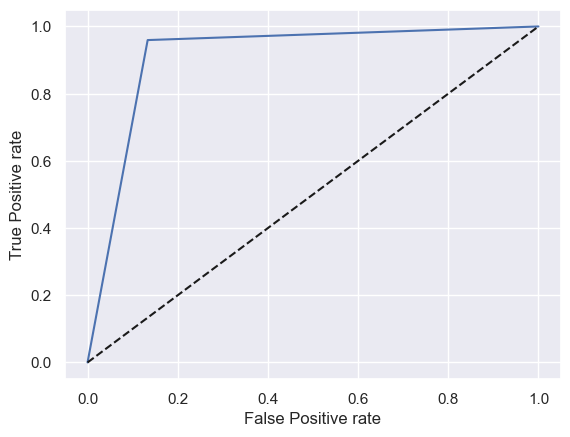

<==========================================================================================>
Area Under Curve :  0.9130630630630631


In [54]:
print('<==========================================================================================>')
print('Confusion Matrix','\n',confusion_matrix(compare['test'],compare['pred']))
print('<==========================================================================================>')
print('Classification Report','\n',classification_report(compare['test'],compare['pred']))
print('<==========================================================================================>')
fpr , tpr , threshold = roc_curve(compare['test'],compare['pred'])
auc = roc_auc_score = roc_auc_score(compare['test'],compare['pred'])
plt.plot(fpr,tpr,color='b')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()
print('<==========================================================================================>')
print('Area Under Curve : ',auc)

<b>Summary<br>
<b>We developed a sequential model with,<br>

<b>1. 3 hidden layers of nueral network with 'relu' activation function<br>
<b>2. Learning rate of .01<br>
<b>3. Prediction accuracy of 0.932<br>
<b>4. AUC =0.913<br>
<b>5. Majority class f1 score of 0.95 and minority class f1 score of 0.88.


In [1]:
import numpy as np

In [2]:
a = ([1,3],[2,4])
b = ([1,2],[3,4])

In [3]:
np.dot(a,b)

array([[10, 14],
       [14, 20]])

In [5]:
import numpy as np

a1 = np.array([[1, 3], [2, 4]])
b1 = np.array([[1, 2], [3, 4]])

# Perform matrix multiplication
result_matrix = np.dot(a1, b1)

# Sum up the elements of the resulting matrix to get a single number
result_sum = np.trace(result_matrix)

print(result_sum)


30


In [7]:
np.trace([[1,3],[2,4]])

5